# Libraries and Data Load

## Load Libraries

In [1]:
######################################################Initial Packages########################################################
#Basic Operating System Stuff
import os
import gc #garbage collector
import random #random seed generator

#Basic dataframe, array, and math stuff
import pandas as pd #data frame
from pandas_profiling import ProfileReport
import math #math functions
import numpy as np    #numerical package

#Scikit learn
from math import sqrt
import sklearn as sk  #scikit learn
import sklearn.linear_model 
from sklearn.linear_model import LogisticRegression as LR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample #sampling
from sklearn.model_selection import train_test_split as tts, KFold #train test split
from sklearn.decomposition import PCA #principal components
from imblearn.over_sampling import SMOTE #synthetic minority oversampling technique
from sklearn.metrics import classification_report as CR,confusion_matrix, roc_curve
from sklearn.metrics import average_precision_score #for 2-class model
from sklearn.metrics import PrecisionRecallDisplay as PRD
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.preprocessing import MinMaxScaler as MMS, StandardScaler as SS, PolynomialFeatures as poly # used for variable scaling data
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier as RFC, ExtraTreesClassifier as ETC
from sklearn.ensemble import GradientBoostingClassifier as GBC, AdaBoostClassifier as ABC
from sklearn.gaussian_process import GaussianProcessClassifier as GPC  
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.naive_bayes import BernoulliNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import plot_tree as treeplot, export_graphviz

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler as RUS

from scipy import misc, stats as st #Lots of stuff here
from scipy.stats import norm
import itertools

import statsmodels.api as sm
import pyreadstat

#Graphing
import seaborn as sns
import pydot_ng as pydot  #For model plotting
import graphviz #python-graphviz package
from IPython.display import SVG #Same here
import matplotlib.pyplot as plt #plotting
import matplotlib #image save
from matplotlib.pyplot import imshow #Show images
from PIL import Image #Another image utility
import cv2 #more image utilities
import seaborn as sns

%matplotlib inline

os.chdir('C:/Users/lfult/Desktop/Breach')
##############################################################################################################################

# Load Data

In [2]:
##############################################################################################################################
mydata=pd.read_csv('merged.csv')
print(mydata.shape, mydata.columns)
##############################################################################################################################

(1032, 33) Index(['M', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME',
       'LSAD', 'ALAND', 'AWATER', 'FIPS', 'y', 'BreachesPer100K',
       'OpProfitMargin', 'CapitalExp', 'OpIncome', 'AR', 'BadDebt', 'BedUtil',
       'OutpatientVisits', 'ALOS', 'PopDensity', 'Native', 'Hispanic', 'Black',
       'Asian', 'Prop65', 'UE2019', 'Poverty', 'AcuteBeds', 'CMI', 'PedTrauma',
       'MedCenter'],
      dtype='object')


# Drop Variables

In [3]:
mydata=mydata.drop(['ALAND','AWATER','M','BreachesPer100K', 'FIPS','COUNTYFP','COUNTYNS','AFFGEOID','GEOID','NAME','LSAD', 
                   'STATEFP'], axis=1)
mydict={0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1}
mydata['y']=mydata['y'].map(mydict)

# Feature Engineer

In [4]:
mydata['ALOS'].values[mydata['ALOS'].values==70]=7
mydata['BedFreqSev']=mydata['BedUtil'].values*mydata['CMI'].values*mydata['ALOS'].values
mydata['OutpatientDensity']=mydata['OutpatientVisits'].values/mydata['PopDensity']
mydata=mydata.drop(['BedUtil', 'CMI', 'ALOS','OutpatientVisits'], axis=1)

# Look at Missing

<AxesSubplot: >

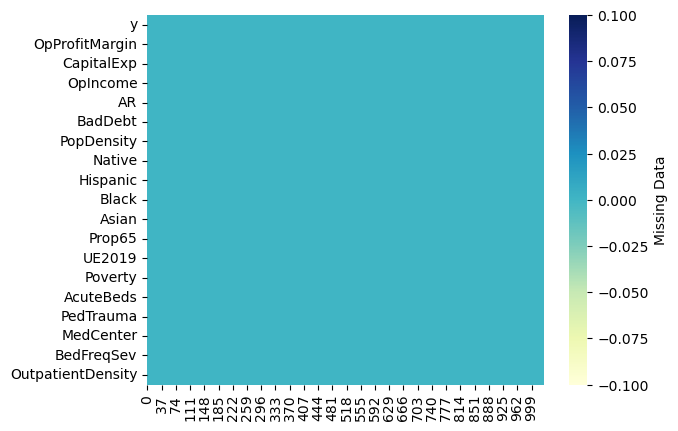

In [5]:
sns.heatmap(mydata.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

# Describe

In [6]:
pd.set_option('display.max_columns', None)
mydata.describe()

,y,OpProfitMargin,CapitalExp,OpIncome,AR,BadDebt,PopDensity,Native,Hispanic,Black,Asian,Prop65,UE2019,Poverty,AcuteBeds,PedTrauma,MedCenter,BedFreqSev,OutpatientDensity
count,1032.000000,1032.000000,1.032000e+03,1.032000e+03,1.032000e+03,1.032000e+03,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,0.226744,-0.008076,5.863433e+07,-3.257404e+06,1.511046e+08,2.336622e+07,272.233126,0.009049,0.109103,0.103048,0.026272,0.178902,3.863178,13.982849,587.272287,0.052326,0.112403,3.925567,3309.299365
std,0.418929,0.168889,5.603603e+08,9.748917e+07,2.682504e+08,3.448439e+07,1184.818900,0.029577,0.135438,0.133228,0.039389,0.042242,1.221946,5.182866,1164.706707,0.222791,0.316015,2.003205,5800.032641
min,0.000000,-2.091000,-2.130320e+08,-1.109646e+09,-1.012901e+09,1.972380e+05,1.163621,0.000000,0.002000,0.000000,0.000000,0.079000,1.800000,2.600000,0.000000,0.000000,0.000000,0.000000,7.407321
25%,0.000000,-0.084500,3.573528e+06,-1.742276e+07,2.523224e+07,5.460736e+06,28.531658,0.002000,0.031000,0.015000,0.007157,0.150000,3.100000,10.300000,97.750000,0.000000,0.000000,2.386702,681.809682
50%,0.000000,-0.009500,1.031511e+07,-1.388767e+06,6.144047e+07,1.176014e+07,68.867526,0.003000,0.059000,0.048000,0.013253,0.175000,3.700000,13.600000,233.500000,0.000000,0.000000,3.793501,1511.563154
75%,0.000000,0.073000,2.817007e+07,1.608830e+07,1.598573e+08,2.637678e+07,176.883695,0.005000,0.127250,0.132000,0.029890,0.199000,4.400000,16.800000,575.500000,0.000000,0.000000,5.194659,3445.148884
max,1.000000,1.654375,1.589858e+10,8.024739e+08,3.306532e+09,3.566099e+08,27755.490420,0.392000,0.955000,0.774000,0.430811,0.408000,18.300000,38.200000,19274.000000,1.000000,1.000000,10.762427,73297.250284


# Build Training and Test Set, Scale

In [7]:
##############################################################################################################################
# Seed value for random number generators to obtain reproducible results
train, test=tts(mydata,test_size=.2, random_state=31, shuffle=True)

myscaler=SS() #standard scaler, MMS = min-max
y_train=train['y']
X_train=train.drop(['y'], axis=1)
mynames=X_train.columns
print(mynames)
X_train=pd.DataFrame(myscaler.fit_transform(X_train), columns=mynames)

y_test=test['y']
X_test=test.drop(['y'], axis=1)
X_test=pd.DataFrame(myscaler.transform(X_test), columns=mynames)
##############################################################################################################################

Index(['OpProfitMargin', 'CapitalExp', 'OpIncome', 'AR', 'BadDebt',
       'PopDensity', 'Native', 'Hispanic', 'Black', 'Asian', 'Prop65',
       'UE2019', 'Poverty', 'AcuteBeds', 'PedTrauma', 'MedCenter',
       'BedFreqSev', 'OutpatientDensity'],
      dtype='object')


# Correlations

<AxesSubplot: >

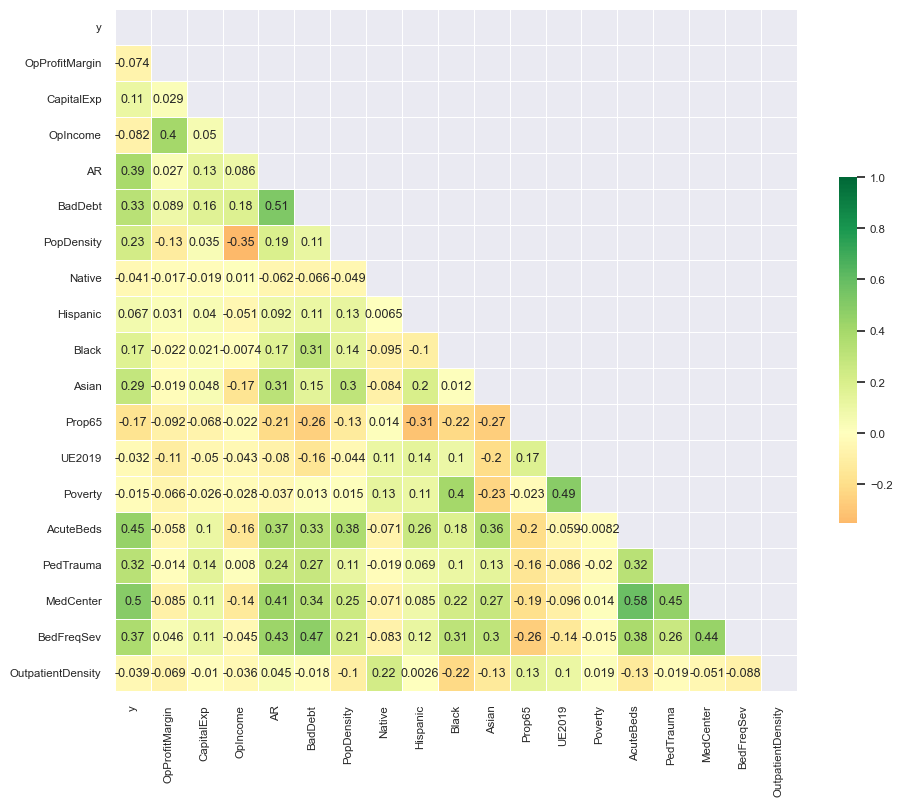

In [8]:
sns.set(font_scale=.75)
corr = mydata.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, cmap='RdYlGn')

# Oversample Training Set

In [9]:
sm=SMOTE(random_state=1, sampling_strategy=1, k_neighbors=10)
X_train2, y_train2 = sm.fit_resample(X_train,y_train)
print(np.mean(y_train2))
X_train2=pd.DataFrame(X_train2, columns=mynames)

0.5


# Get the GLM Results

In [10]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.stats.tests.test_influence

res = GLM(
    y_train2,
    X_train2,
    family=families.Binomial(),
).fit(attach_wls=True, atol=1e-10)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1276
Model:                            GLM   Df Residuals:                     1258
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -607.13
Date:                Mon, 16 Oct 2023   Deviance:                       1214.3
Time:                        14:49:18   Pearson chi2:                 1.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3525
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
OpProfitMargin       -0.2811      0.09

# Get Influential Observations

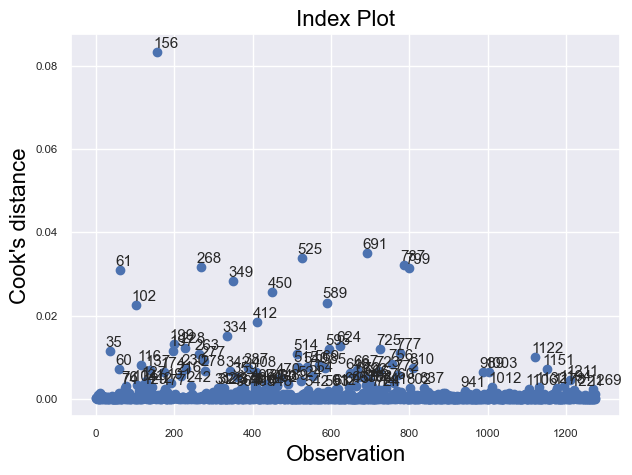

In [11]:
infl = res.get_influence(observed=False)
summ_df = infl.summary_frame()
fig = infl.plot_index(y_var="cooks", threshold=2 * infl.cooks_distance[0].mean())
fig.tight_layout(pad=1.0)

# Functions for Confusion Matrix and PR Plot

## Confusion Matrix on Unseen, Pristine Test Set Only

In [12]:
def myf(mod):
    y_hat=mod.predict(X_test) #can use either encoded or decoded data..doesn't help
    results=pd.DataFrame(CR(y_test, y_hat, output_dict=True))
    try:  
        CMD.from_estimator(mod,X_test,y_test)
    except:
        print('No confusion plot.')
    return(results)

def prplot(mod):
    average_precision = average_precision_score(y_test, mod.predict(X_test))
    disp = PRD.from_estimator(mod, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
    
def mytree(mod):
    imp, std=mod.feature_importances_, np.std([mod.feature_importances_ for tree in mod.estimators_], axis=0)
    importances = pd.Series(imp, index=mydata.columns[1:20]).sort_values(ascending=False)
    fig, ax = plt.subplots()
    importances.plot.bar(yerr=std[0:20], ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()   

# Logistic Regression

                    0          1  accuracy   macro avg  weighted avg
precision    0.923611   0.571429  0.816425    0.747520      0.843647
recall       0.831250   0.765957  0.816425    0.798604      0.816425
f1-score     0.875000   0.654545  0.816425    0.764773      0.824945
support    160.000000  47.000000  0.816425  207.000000    207.000000


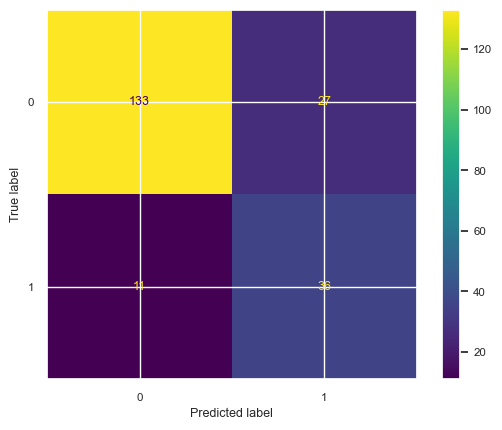

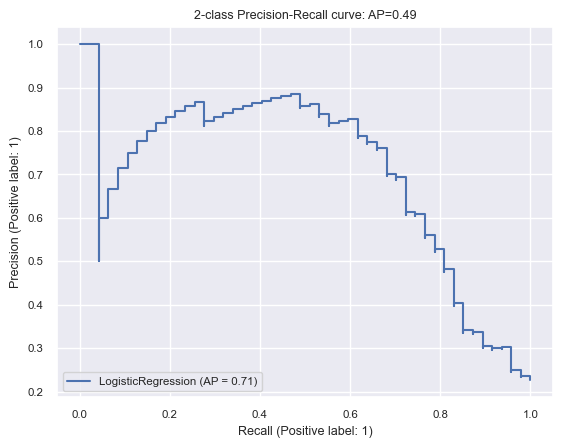

In [13]:
##############################################################################################################################
mylr=LR(fit_intercept = True, class_weight='balanced') #logistic model
mylr.fit(X_train2, y_train2)  #Fit on training data 
print(myf(mylr)) #predict on test set and plot
prplot(mylr)
##############################################################################################################################

## Coefficients

In [14]:
feature_names = mynames
lrdf=pd.DataFrame(np.squeeze(mylr.coef_), columns=['LR_coef'])
lrdf.index=np.squeeze(feature_names)
predProbs = mylr.predict_proba(X_train)
X_design = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
V = np.diagflat(np.product(predProbs, axis=1))
covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
lrdf['SE']=np.sqrt(np.diag(covLogit))[1:106]

lrdf['Odds_Ratio']=np.exp(lrdf['LR_coef'])
lrdf['OR_Lower_5%']=np.exp(lrdf['LR_coef']-1.96*lrdf['SE'])
lrdf['OR_Upper_5%']=np.exp(lrdf['LR_coef']+1.96*lrdf['SE'])
lrdf['Z']=lrdf['LR_coef']/lrdf['SE']

lrdf['p_value']=np.round(1-norm.cdf(abs(lrdf['Z'])),3)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X=pd.DataFrame(X_train2)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]
lrdf['VIF']=vif_data.values[:,1]


lrdf
#lrdf.sort_values(by=['Odds_Ratio'], ascending=False)

,LR_coef,SE,Odds_Ratio,OR_Lower_5%,OR_Upper_5%,Z,p_value,VIF
OpProfitMargin,-0.296991,0.104362,0.743051,0.605598,0.911702,-2.845787,0.002,1.36699
CapitalExp,-0.000187,0.142701,0.999813,0.755873,1.322479,-0.001309,0.499,1.071579
OpIncome,0.044891,0.147653,1.045914,0.783089,1.396948,0.304029,0.381,1.783196
AR,0.577647,0.179570,1.781840,1.253186,2.533506,3.216830,0.001,2.177833
BadDebt,-0.112388,0.119275,0.893698,0.707395,1.129066,-0.942259,0.173,2.128571
PopDensity,0.493315,0.342507,1.637737,0.836943,3.204737,1.440306,0.075,1.489704
Native,-0.013384,0.083423,0.986705,0.837869,1.161980,-0.160432,0.436,1.091792
Hispanic,-0.532480,0.127907,0.587147,0.456951,0.754438,-4.163012,0.000,1.404795
Black,-0.066821,0.108183,0.935363,0.756646,1.156292,-0.617664,0.268,1.946036
Asian,0.009214,0.126475,1.009256,0.787670,1.293180,0.072851,0.471,1.75318


# Linear SVM Classifier

                    0          1  accuracy   macro avg  weighted avg
precision    0.914286   0.522388   0.78744    0.718337      0.825304
recall       0.800000   0.744681   0.78744    0.772340      0.787440
f1-score     0.853333   0.614035   0.78744    0.733684      0.799000
support    160.000000  47.000000   0.78744  207.000000    207.000000
None


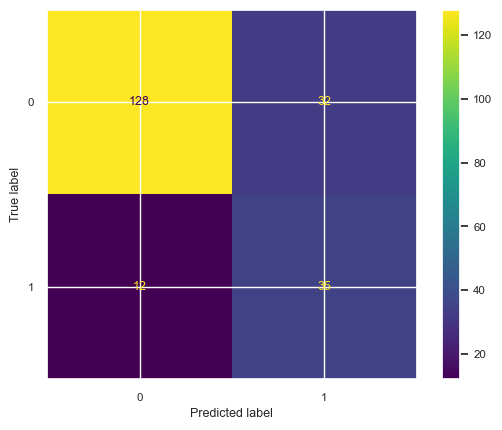

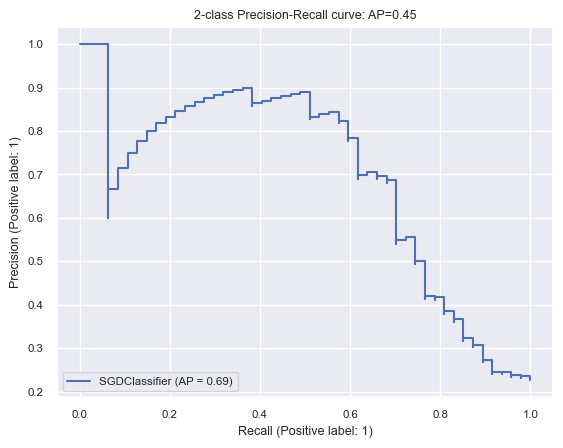

In [15]:
mysgd=SGD(loss='log_loss', fit_intercept=True, random_state=64, class_weight='balanced')
mysgd.fit(X_train2,y_train2)
print(myf(mysgd))
print(prplot(mysgd))

## Coefficients

In [16]:
sgddf=pd.DataFrame(np.squeeze(mysgd.coef_), columns=['SGD_coef'])
sgddf.index=np.squeeze(feature_names)
#sgddf.sort_values(by=['SGD_expcoef'], ascending=False)

# Perceptron

                    0          1  accuracy   macro avg  weighted avg
precision    0.852941   0.380282  0.690821    0.616611      0.745622
recall       0.725000   0.574468  0.690821    0.649734      0.690821
f1-score     0.783784   0.457627  0.690821    0.620705      0.709729
support    160.000000  47.000000  0.690821  207.000000    207.000000
None


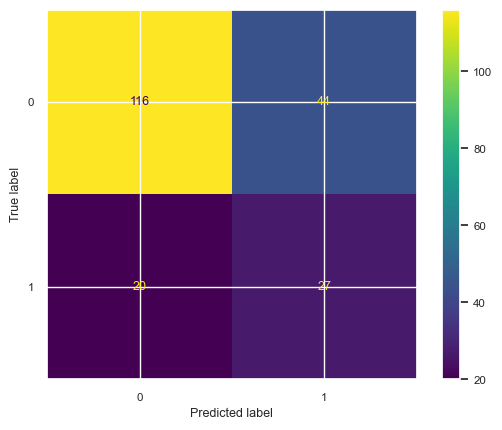

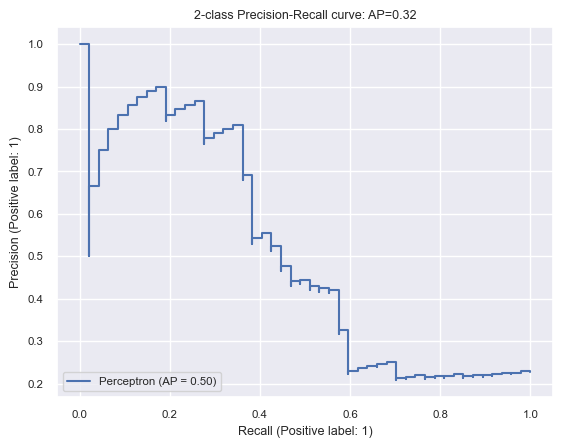

In [17]:
nn = Perceptron(alpha=1e-5, random_state=64, max_iter=1000)
nn.fit(X_train2, y_train2)
print(myf(nn))
print(prplot(nn))

## Coefficients

In [18]:
nndf=pd.DataFrame(np.squeeze(nn.coef_), columns=['NN_coef'])
nndf.index=np.squeeze(feature_names)
#nndf.sort_values(by=['NN_expcoef'], ascending=False)

# Linear SVC

                    0          1  accuracy   macro avg  weighted avg
precision    0.924658   0.590164  0.826087    0.757411      0.848710
recall       0.843750   0.765957  0.826087    0.804854      0.826087
f1-score     0.882353   0.666667  0.826087    0.774510      0.833381
support    160.000000  47.000000  0.826087  207.000000    207.000000
None


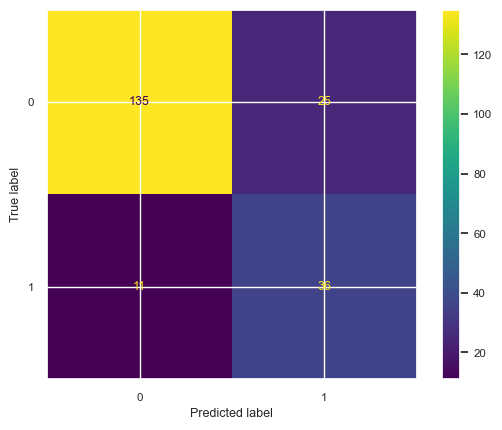

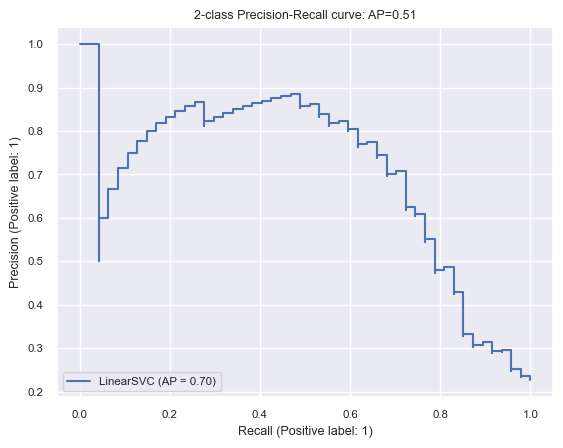

In [19]:
mysvm=LinearSVC(random_state=64, tol=1e-2, max_iter=50000)
mysvm.fit(X_train2, y_train2)  #Fit on training set
print(myf(mysvm))
print(prplot(mysvm))

## Coefficients

In [20]:
mysvmdf=pd.DataFrame(np.squeeze(mysvm.coef_), columns=['SVM_coef'])
mysvmdf.index=np.squeeze(feature_names)

# Tree Models

## Gradient Boosting

                    0          1  accuracy   macro avg  weighted avg
precision    0.887417   0.535714  0.792271    0.711566      0.807562
recall       0.837500   0.638298  0.792271    0.737899      0.792271
f1-score     0.861736   0.582524  0.792271    0.722130      0.798340
support    160.000000  47.000000  0.792271  207.000000    207.000000
None
None


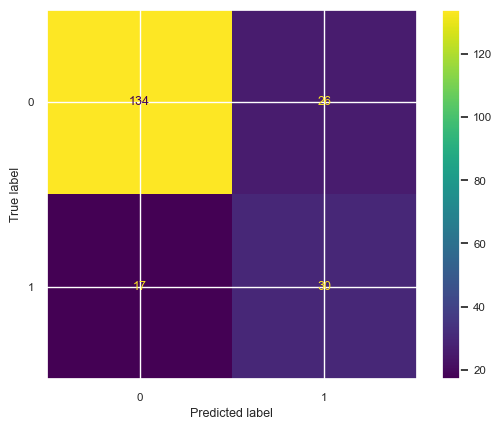

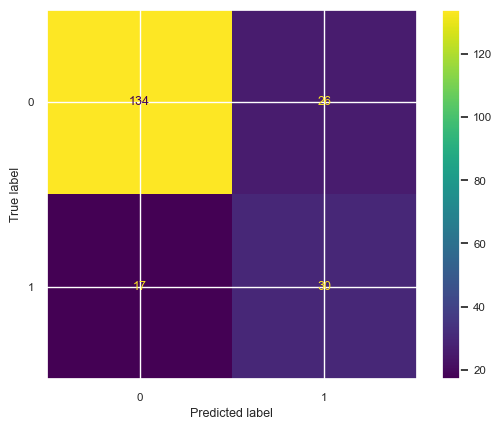

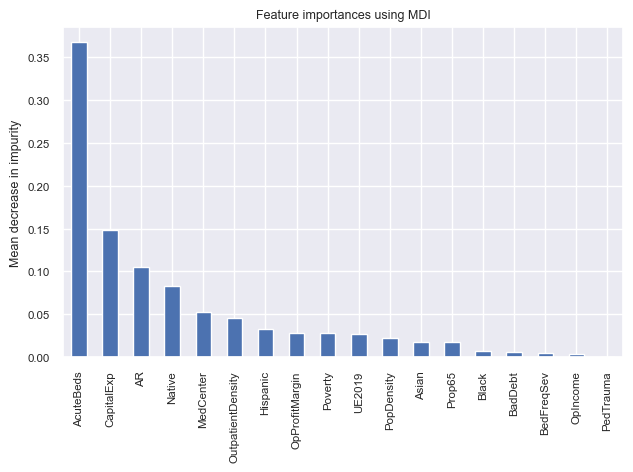

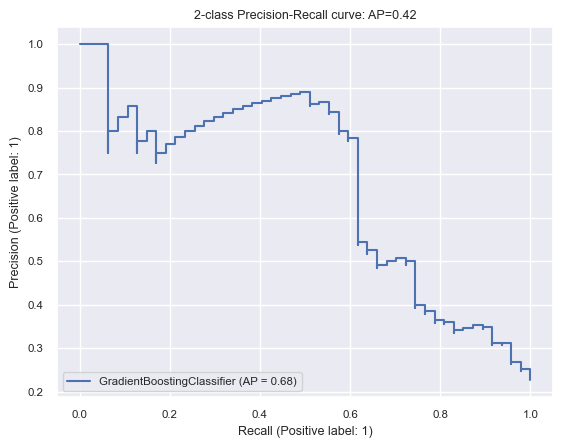

In [21]:
myGBC=GBC(n_estimators =1000, random_state = 64, max_depth=1)
myGBC.fit(X_train2, y_train2)  #Fit on training set
myf(myGBC)
print(myf(myGBC))
print(mytree(myGBC))
print(prplot(myGBC))
imp, std=myGBC.feature_importances_, np.std([myGBC.feature_importances_ for tree in myGBC.estimators_], axis=0)
GBCimp = pd.Series(imp, index=mydata.columns[1:20])



## ADA Boost

                    0          1  accuracy   macro avg  weighted avg
precision    0.870968   0.519231  0.782609    0.695099      0.791105
recall       0.843750   0.574468  0.782609    0.709109      0.782609
f1-score     0.857143   0.545455  0.782609    0.701299      0.786373
support    160.000000  47.000000  0.782609  207.000000    207.000000
None
None


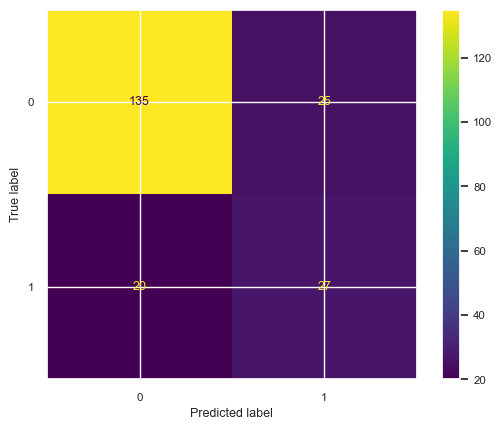

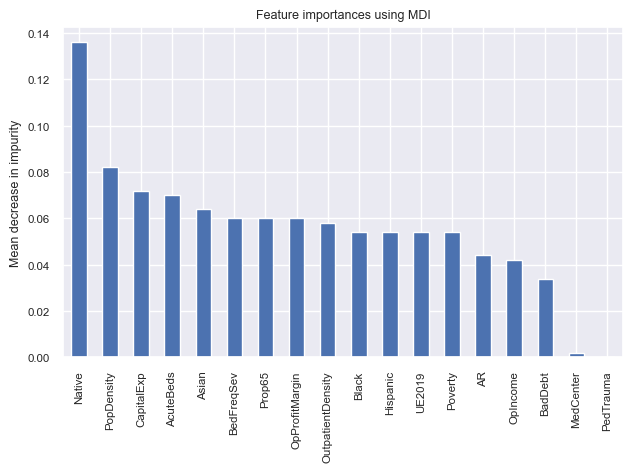

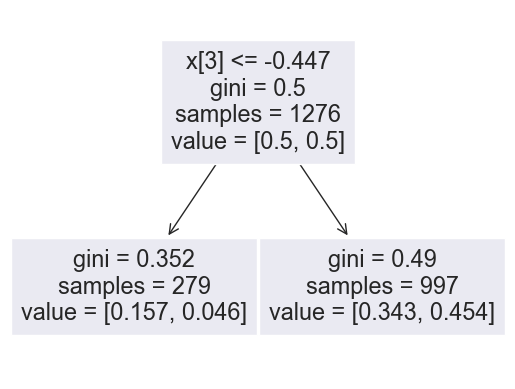

In [22]:
myADA=ABC(n_estimators=500, random_state=0)
myADA.fit(X_train2,y_train2)
print(myf(myADA))
print(mytree(myADA))
print(prplot(myADA))
treeplot(myADA.estimators_[1])
imp, std=myADA.feature_importances_, np.std([myADA.feature_importances_ for tree in myADA.estimators_], axis=0)
ADAimp = pd.Series(imp, index=mydata.columns[1:20])


# RF

                    0          1  accuracy   macro avg  weighted avg
precision    0.907801   0.515152  0.782609    0.711476      0.818649
recall       0.800000   0.723404  0.782609    0.761702      0.782609
f1-score     0.850498   0.601770  0.782609    0.726134      0.794024
support    160.000000  47.000000  0.782609  207.000000    207.000000
None
None


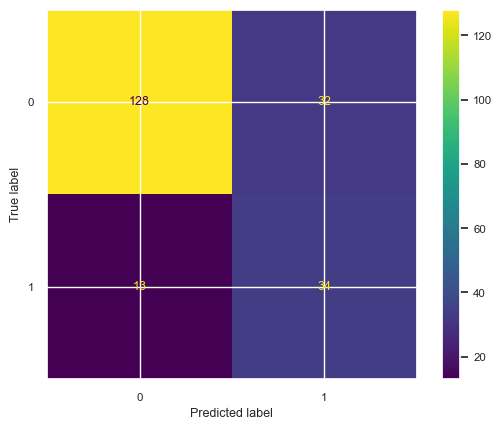

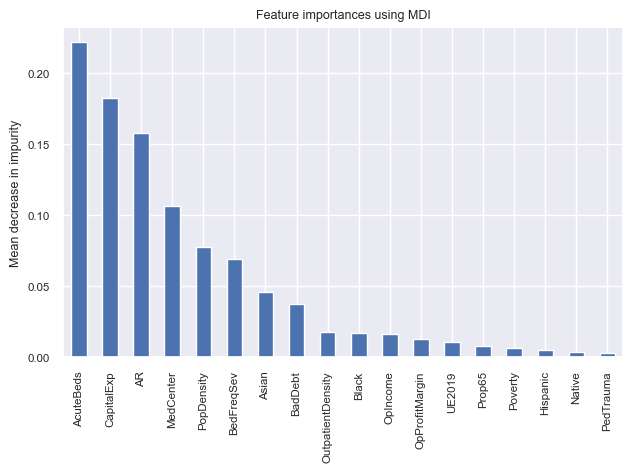

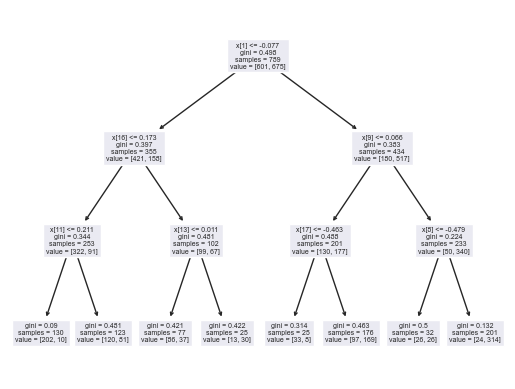

In [23]:
myrf=RFC(n_estimators = 500,max_depth=3,criterion='gini',bootstrap=True,                   
                            n_jobs = -1, random_state = 64) #RF Model
myrf.fit(X_train2, y_train2)  # Fit on the training set 
print(myf(myrf))
print(mytree(myrf))
print(prplot(myrf))
treeplot(myrf.estimators_[1])
imp, std=myrf.feature_importances_, np.std([myrf.feature_importances_ for tree in myrf.estimators_], axis=0)
rfimp = pd.Series(imp, index=mydata.columns[1:20])


# Decision Tree

                    0          1  accuracy   macro avg  weighted avg
precision    0.906977   0.448718    0.7343    0.677847      0.802928
recall       0.731250   0.744681    0.7343    0.737965      0.734300
f1-score     0.809689   0.560000    0.7343    0.684844      0.752996
support    160.000000  47.000000    0.7343  207.000000    207.000000
None


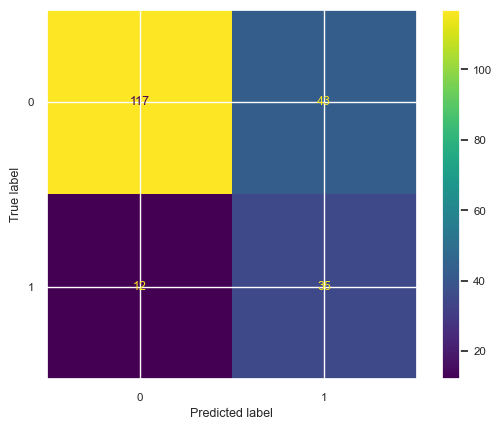

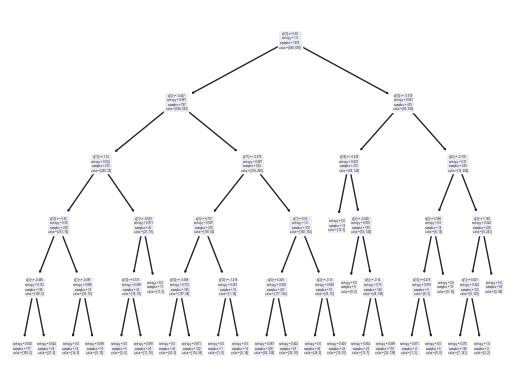

In [24]:
myDT=Tree(criterion='entropy', splitter='best', max_depth=5,random_state=64)
myDT.fit(X_train2,y_train2)
print(myf(myDT))
print(prplot(myDT))
treeplot(myDT)
imp=myDT.feature_importances_
DTimp = pd.Series(imp, index=mydata.columns[1:20])

# Matrix of Coefficients

In [25]:
lrdf['SGD']=sgddf.values
lrdf['NN']=nndf.values
lrdf['DT']=DTimp.values
lrdf['RF']=rfimp.values
lrdf['GBC']=GBCimp.values
lrdf['ADA']=ADAimp.values
lrdf['SVM']=mysvmdf.values
lrdf

,LR_coef,SE,Odds_Ratio,OR_Lower_5%,OR_Upper_5%,Z,p_value,VIF,SGD,NN,DT,RF,GBC,ADA,SVM
OpProfitMargin,-0.296991,0.104362,0.743051,0.605598,0.911702,-2.845787,0.002,1.36699,-0.894689,-2.978226,0.014233,0.012468,0.028063,0.060,-0.108422
CapitalExp,-0.000187,0.142701,0.999813,0.755873,1.322479,-0.001309,0.499,1.071579,0.399282,12.401733,0.024178,0.182978,0.148013,0.072,-0.000840
OpIncome,0.044891,0.147653,1.045914,0.783089,1.396948,0.304029,0.381,1.783196,0.272760,0.366304,0.000000,0.016609,0.004260,0.042,0.014385
AR,0.577647,0.179570,1.781840,1.253186,2.533506,3.216830,0.001,2.177833,0.925627,6.768236,0.184400,0.158061,0.105349,0.044,0.231747
BadDebt,-0.112388,0.119275,0.893698,0.707395,1.129066,-0.942259,0.173,2.128571,0.073808,0.270861,0.000000,0.037309,0.006301,0.034,-0.049055
PopDensity,0.493315,0.342507,1.637737,0.836943,3.204737,1.440306,0.075,1.489704,0.967816,3.690287,0.037800,0.077675,0.022754,0.082,0.188223
Native,-0.013384,0.083423,0.986705,0.837869,1.161980,-0.160432,0.436,1.091792,-0.228782,-0.989345,0.000000,0.003306,0.082573,0.136,-0.008304
Hispanic,-0.532480,0.127907,0.587147,0.456951,0.754438,-4.163012,0.000,1.404795,-1.183374,-5.122272,0.045026,0.005355,0.033322,0.054,-0.193875
Black,-0.066821,0.108183,0.935363,0.756646,1.156292,-0.617664,0.268,1.946036,-0.098522,0.188065,0.000000,0.016825,0.007647,0.054,-0.024950
Asian,0.009214,0.126475,1.009256,0.787670,1.293180,0.072851,0.471,1.75318,-0.513545,-3.836522,0.014363,0.045856,0.017461,0.064,0.006026


# Cofficient and Importance Correlations

<AxesSubplot: >

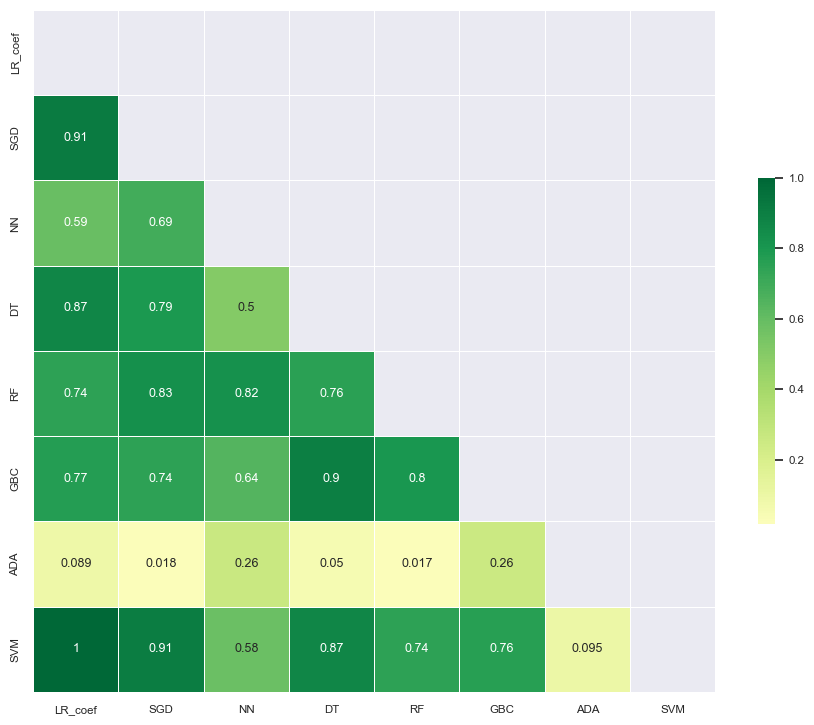

In [27]:
coef=lrdf[['LR_coef','SGD','NN', 'DT', 'RF', 'GBC', 'ADA', 'SVM' ]]
corr=coef.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, cmap='RdYlGn')